# Лабораторная работа 1
## Задача о падении тела. Построение графиков функций

## Куницкий Тимофей Александрович, 13.02.2025

## Задание 1.1. Задача о падении тела

### Этап 1. Импортирование модулей

In [1]:
import math 

In [2]:
math.sin(math.pi/2)

1.0

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import scipy.constants as const

In [6]:
import sympy

### Этап 2. Создание переменных

In [7]:
h_start = 1
h_end = 3.0E+0
T = 3.0
s_end = 5.0e0

In [8]:
h_end
h_start

1

In [9]:
print(h_start, h_end)

1 3.0


In [10]:
g = const.g
g, const.unit('standard acceleration of gravity')

(9.80665, 'm s^-2')

In [50]:
print(dir(const))

['Avogadro', 'Boltzmann', 'Btu', 'Btu_IT', 'Btu_th', 'ConstantWarning', 'G', 'Julian_year', 'N_A', 'Planck', 'R', 'Rydberg', 'Stefan_Boltzmann', 'Wien', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_obsolete_constants', 'acre', 'alpha', 'angstrom', 'arcmin', 'arcminute', 'arcsec', 'arcsecond', 'astronomical_unit', 'atm', 'atmosphere', 'atomic_mass', 'atto', 'au', 'bar', 'barrel', 'bbl', 'blob', 'c', 'calorie', 'calorie_IT', 'calorie_th', 'carat', 'centi', 'codata', 'constants', 'convert_temperature', 'day', 'deci', 'degree', 'degree_Fahrenheit', 'deka', 'dyn', 'dyne', 'e', 'eV', 'electron_mass', 'electron_volt', 'elementary_charge', 'epsilon_0', 'erg', 'exa', 'exbi', 'femto', 'fermi', 'find', 'fine_structure', 'fluid_ounce', 'fluid_ounce_US', 'fluid_ounce_imp', 'foot', 'g', 'gallon', 'gallon_US', 'gallon_imp', 'gas_constant', 'gibi', 'giga', 'golden', 'golden_ratio', 'grain', 'gram', 'gravitational_con

In [11]:
print(const.Avogadro, const.pi,const.c)

6.02214076e+23 3.141592653589793 299792458.0


In [12]:
step = 0.01
t_list = [0 + i*step for i in range(int(T/0.01))]
t_array = np.arange(0,T,step)


range - возвращает последовательность чисел от start(=0 по умолчанию) до stop(необязательно, конечное значение не включается) c шагом step(необязательно.Должен быть целочисленным). range(start, stop, step) возваращет объект типа range

In [13]:
range(3, 8,2)
    

range(3, 8, 2)

arange() возвращает одномерный массив с значениями от start до stop(невключая) c шагом step(может быть вещественным).  
np.arange(start,stop, step) возвращает объект типа ndarray.

In [14]:
np.arange(1,10,2)


array([1, 3, 5, 7, 9])

### Этап 3. Опредление функции перемещения и нахождения угла запуска тела

Чтобы получить аналитический вид фунции (s_x(t),s_y(t)) можно
проинтегрировать $$(s_x)''(t)=0$$ и $$(s_y)''(t)=-g$$. Получим :
$$(s_x)'(t)=v0_x$$
$$s_x(t) = v0_x*t+s_x(0)$$
$$(s_y)'(t) = -gt+v0_y$$
$$s_y(t)= s_y(0)+v0_y*t - g*t^2/2$$
Итоговые выражения:
$$s_x(t) = v0_x*t$$
$$s_y(t) = h_start + v0_y*t -g*t^2/2$$


In [15]:
v0_x = s_end/T
v0_x

1.6666666666666667

In [16]:
v0_y = (h_end - h_start + g/2*T**2)/T
v0_y

15.376641666666666

In [17]:
alpha = math.atan(v0_y/v0_x)
alpha, math.degrees(alpha)

(1.462828312588189, 83.81388846354714)

In [54]:
f's_x(t)= {v0_x} t'

's_x(t)= 1.6666666666666667 t'

In [19]:
f's_y(t) = {h_start} + {v0_y:.6} t - {g:.6}/2*t\N{superscript two}'

's_y(t) = 1 + 15.3766 t - 9.80665/2*t²'

### Этап 4. Построение графика траектории движения тела

In [20]:
t_list, t_array;

In [21]:
s_x_list = [v0_x*t for t in t_list]
s_y_list = [h_start + v0_y*t - g*t**2/2 for t in t_list]


In [22]:
s_x_array = v0_x*t_array
s_y_array = h_start + v0_y*t_array - g*t_array**2/2


(0.0, 5.0, 0.0, 14.0)

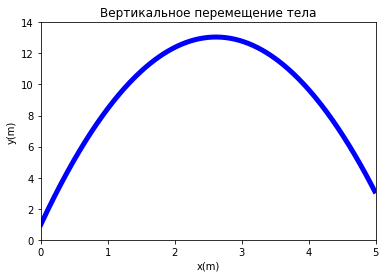

In [73]:
plt.figure()
plt.plot(s_x_list,s_y_list,'b-',lw=5)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x(m)'); plt.ylabel('y(m)')

plt.axis([0, s_end, 0, h_end+11])

(0.0, 14.0)

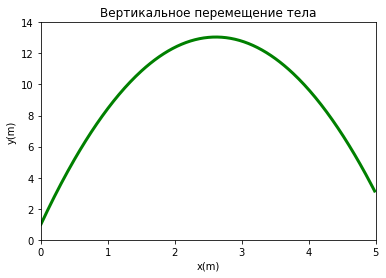

In [74]:
plt.figure()
plt.plot(s_x_array,s_y_array,'g',lw=3)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x(m)'); plt.ylabel('y(m)')
plt.xlim(0,s_end)
plt.ylim(0, h_end+11)

## Задание 1.2. Построение графиков функций

In [76]:

t = sympy.symbols('t')
result = sympy.solve(h_start + v0_y*t-g*t**2/2,t)
result

[-0.0637382309488101, 3.19970039267921]

In [26]:
t_star_exact = result[-1]
t_star_exact

3.19970039267921

Функция symbols() в библиотеке SymPy предназначена для создания и возврата символьных объектов (или кортежа таких объектов), используемых в символьных вычислениях. Ее вызов осуществляется следующим образом:  
sympy.symbols(names, **kwargs), где kwargs – необязательный параметр, определяющий свойства символов, например: real=True, positive=True и другие.  

Функция solve используется для нахождения решений уравнений или систем уравнений. Вызов функции осуществляется так:  
sympy.solve(equations, variables=None, **kwargs), где kwargs позволяет задать дополнительные параметры, например:  
dict=True – выводит решения в виде словаря,  
set=True – возвращает решения в формате множества,  
check=True/False – включает или отключает проверку корней.

In [27]:
#1 пример
x=sympy.symbols('x')
y=x**2+5
res1=sympy.solve(y,x)
#2 пример
x=sympy.symbols('x')
y=x**3+3
res2=sympy.solve(y,x)
print(res1,res2)

[-sqrt(5)*I, sqrt(5)*I] [-3**(1/3), 3**(1/3)/2 - 3**(5/6)*I/2, 3**(1/3)/2 + 3**(5/6)*I/2]


In [85]:
t_list= [i*step for i in range(int(1.5*T/step))]
s_y = [h_start + v0_y*t - g*t**2/2 for t in t_list]
for k,y in enumerate(s_y):
    if (y)<0:
        points_x = [t_list[k-1],t_list[k]]
        points_y = [s_y[k-1],s_y[k]]
        
        break;



[3.19, 3.2]

(3.198, 3.2, -0.004794666666676051, 0.004761384166661747)

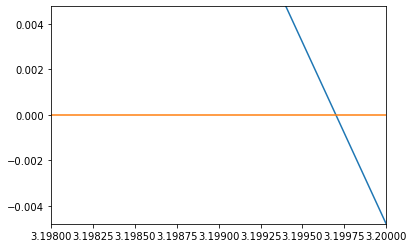

In [86]:
plt.figure()
plt.plot(points_x,points_y)
plt.plot(points_x, [0,0])
plt.axis([3.198, 3.2, points_y[1],points_y[0]-0.15])

Воспользуемся уравнением $$y=k*x+b$$. Коэффициент $$k=(y2-y1/x2-x1)$$
$$b=y1-k*x1$$
Найдём x0 при y=0 
$$x0=-b/k$$

In [49]:
k=(points_y[1]-points_y[0])/(points_x[1]-points_x[0])
b=points_y[0]-k*points_x[0]
x0=-b/k
x0

3.1996994995400283

In [31]:
print(f"Относительная ошибка: {(t_star_exact-x0)/t_star_exact}")

Относительная ошибка: 2.79132127839983E-7


### Задание 1.3. Построение секущей, касательной и нормали к графику функции

In [32]:
p_start = np.array([s_x_array[0],s_y_array[0]])
p_end = np.array([s_x_array[-1],s_y_array[-1]])
p_start, p_end

(array([0., 1.]), array([4.98333333, 3.13994275]))

In [33]:
a = p_end-p_start
a

array([4.98333333, 2.13994275])

In [91]:
p = [p_start + a*t for t in [-1, 2]] 
p = np.array(p)

p,p[:,0]

(array([[-1.,  0.],
        [ 2.,  3.]]),
 array([-1.,  2.]))

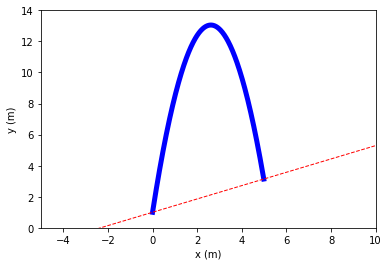

In [35]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=5)
plt.plot(p[:,0],p[0:,1],'--',color='red',lw=1) # обратите внимание не специальную
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-5, s_end+5, 0, h_end+11]);

$$k1=tga=f'(x), k=v0_y - g * t0$$

Чтобы найти нормаль воспользуемся свойством перпендикулярный прямый : k1*k2=-1
    
$$k2=-1/k1$$

$$y=k2*x+h_start$$

In [80]:
k1=v0_y -g*t_array[0]
x_array = np.arange(-5,T+10,0.01)
y1_array = k1*x_array+h_start

k2=-1/k1

y2_array = k2*x_array + h_start

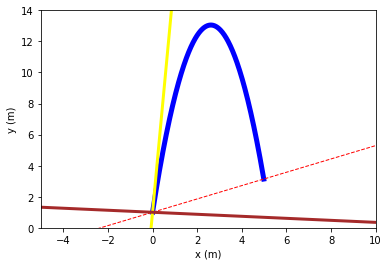

In [81]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=5)
plt.plot(p[:,0],p[0:,1],'--',color='red',lw=1) # обратите внимание не специальную
plt.plot(x_array,y1_array, lw=3,color='yellow')
plt.plot(x_array,y2_array, lw=3,color='brown')
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-5, s_end+5, 0, h_end+11]);

## Задание 1.4 Построение графиков функции

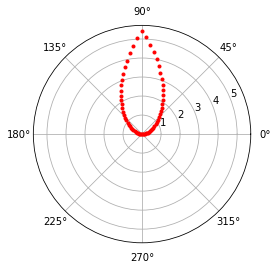

In [38]:

plt.figure()
# установка способа отображения осей
plt.axes(projection='polar')
# подготовка данных
phi = np.arange(-np.pi/2, np.pi/2, 0.05)
r = phi**3+phi
# построение графика
plt.plot(phi + (r<0)*np.pi,abs(r),'r.');

 6. а) Улитка Паскаля

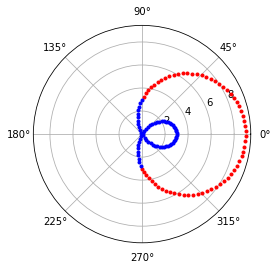

In [100]:
plt.figure()
plt.axes(projection='polar')
phi = np.arange(-np.pi/2, np.pi/2, 0.05)
a = 3
l = 3
r1 = 2 * a * np.cos(phi) + l
r2 = 2 * a * np.cos(phi) - l
plt.plot(phi + (r1 < 0) * np.pi, abs(r1), 'r.')
plt.plot(phi + (r2 < 0) * np.pi, abs(r2), 'b.')


Text(0, 0.5, 'y')

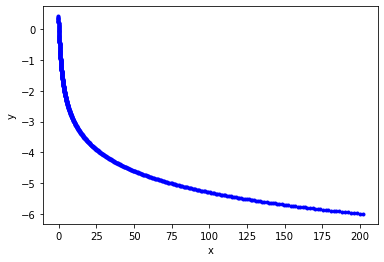

In [40]:
t = np.arange(-6, 0, 0.01)
x = 1 / np.tan(2 * np.exp(t))
y = np.log(np.tan(np.exp(t)))
plt.figure()
plt.plot(x, y, 'b.')
plt.xlabel('x'); plt.ylabel('y')